In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pyscf

In [2]:
np.math.factorial(5)

120

https://www.schulz.chemie.uni-rostock.de/storages/uni-rostock/Alle_MNF/Chemie_Schulz/Computerchemie_3/basis_sets.pdf
https://en.wikipedia.org/wiki/Spherical_harmonics <br>
http://vergil.chemistry.gatech.edu/courses/chem6485/pdf/basis-sets.pdf <br>
https://en.wikipedia.org/wiki/Hydrogen-like_atom <br>
http://www.umich.edu/~chem461/QMChap7.pdf <br>
https://en.wikipedia.org/wiki/STO-nG_basis_sets<br>

In [3]:
"""A electron of course posses also a spin moment, therefore when spin-spin interactions are present we need to include the spin coordinate $\sigma$ which can assume the values of $+ \frac{1}{2}$,$- \frac{1}{2}$ .<br>
Therefore the generalize coordinate for one electron is $\mathbf{x}=<x,y,z,\sigma>$"""

'A electron of course posses also a spin moment, therefore when spin-spin interactions are present we need to include the spin coordinate $\\sigma$ which can assume the values of $+ \x0crac{1}{2}$,$- \x0crac{1}{2}$ .<br>\nTherefore the generalize coordinate for one electron is $\\mathbf{x}=<x,y,z,\\sigma>$'

# The need for a Basis Set

Quantum Chemistry can  be described as the attempt to approximate the exact solutions of the Schroedinger's equation. <br>
In very few cases exists an analytical solution, in many other a numerical approximation is required. <br> 
For a one elecron system the time independent Schroedinger's equation in atomic units is :
$$\left[-\frac{\nabla^2}{2}+\hat{V}_{ext}\right] \Psi(\mathbf{r}) =E \ \Psi(\mathbf{r}) $$

The complexity of which is given from the fact that the equality should hold for every point in space; in standard coordinates the position of the electron is the vector $\mathbf{r}=<x,y,z>$. <br>

The equation for a system of N electrons gets even more complicated: 
$$\left[-\frac{\nabla^2}{2}+\hat{V}_{ext}+\hat{V}_{ee}\right] \Psi(\mathbf{r}_1,\mathbf{r}_2,...,\mathbf{r}_N) =E \ \Psi(\mathbf{r}_1,\mathbf{r}_2,...,\mathbf{r}_N) $$
Where for every electron i $\mathbf{r_i}=<x_i,y_i,z_i>$ . <br>
The problem involves 3N dimensions, that huge dimensionality makes Schroedinger equation impracticle to be solved "point by point" on a grid. If for instance we consider a water molecule (10 electrons) and we chose a grid size of 10 points per dimension, the total number of points on the grid would be $10^{30} $ , a number so huge that can not be allocated in any computer's RAM . 

# LCAO

The first approximation is to consider the wavefuncion of N particle as a untisimmetrized combination of molecular orbitals,  in the case of a single Slater determinant:

$$ \Psi (\mathbf{r}_1,\mathbf{r}_2,...,\mathbf{r}_N) =  N^{-\frac {1}{2}} Det | \varphi _{1} (\mathbf{r}_1) \varphi _{1} ( \mathbf{r}_2), .. , \varphi _{N} ( \mathbf{r}_N) | \
$$

The N particle wavefunction is decomposed in a product of N wavefunctions of a single particle $\varphi _{i} (\mathbf{r}_i)$ , in a molecular calculation those are called " MOLECULAR ORBITALS", those are function of just one 3D coordinate $\mathbf{r}$.<br>
In general is assume to know a little about the shape of those orbitals. <br>
For molecules the orbitals can be approximated through linear combination of atomic orbitals 'LCAO':
$$
\varphi_i^{M.O.}(\mathbf{r})= \sum_{j=1}^Mc_{ij} \chi_j^{A.O.}(\mathbf{r})
$$

The coefficients $c_{μi}$ are called molecular orbital expansion coefficients or simply MO coefficients.
Usually the functions {$\chi$} are located at the center of atoms and are therefore often called atomic basis functions, but since this is not generally true we shall more generally refer to it as the 'basis functions'. 
The number of basis functions $M$ is necessariliy greater than half the number of electrons $N/2$ (if we consider the spin), but in general is much grater than $N$, in fact adding more and more basis functions improves the solution.

The shape and the number of the basis set are reported in bibliography and are specific for each element, we shall now analyse the atomic orbitals construnction starting from the eigenfunction of the hydrogenoid atom. 

# Eigenfunctions of an hydrogenoid atom

A hydrogen atom is a monoelectronic system where actually exist an analytic solution to Schroedinger's equation. Due to the spherical simmetry is convinient to move to a spherical coordinate system $r , \theta, \phi$ .
The potential energy operator is now a function of only the radial distrìance $\hat{V}=-\frac{1}{r}$ , the Laplacian operator for kinetic energy is $\nabla ^2 = {1 \over r^{2}}{\partial  \over \partial r}(r^{2}{\partial  \over \partial r})+{1 \over r^{2}\sin \theta }{\partial  \over \partial \theta }(\sin \theta {\partial  \over \partial \theta })+{1 \over r^{2}\sin ^{2}\theta }{\partial ^{2} \over \partial \phi ^{2}}$. <br>
The Schroedinger equation has than the following form:
$$
\left[ - { 1 \over {2r^2}} {\partial  \over \partial r}(r^{2}{\partial  \over \partial r})-{1 \over r} \right] \Psi- { 1 \over {2r^2}} \left[{1 \over \sin \theta }{\partial  \over \partial \theta }(\sin \theta {\partial  \over \partial \theta })+{1 \over \sin ^{2}\theta }{\partial ^{2} \over \partial \phi ^{2}}  \right] \Psi = E \Psi
$$
Can be rearranged into:
$$
\left[{\partial  \over \partial r}(r^{2}{\partial  \over \partial r})+2r +2r^2 E\right]\Psi+ \left[{1 \over \sin \theta }{\partial  \over \partial \theta }(\sin \theta {\partial  \over \partial \theta })+{1 \over \sin ^{2}\theta }{\partial ^{2} \over \partial \phi ^{2}}  \right] \Psi = 0
$$

The solutions of this equation can be obtained separating the variables and expressing the wavefunction as a product of two functions, one depending on $r$ and the other on $\theta$ and $\phi$:
$$ \Psi(r,\theta,\phi) =R(r) Y (\theta,\phi) $$
Dividing the previous expression by $ \Psi $ we can get the following pair of equation:
$${1\over R(r)}\left[{\partial  \over \partial r}(r^{2}{\partial  \over \partial r})+2r +2r^2 E\right]R(r)= \ell(\ell+1)$$

$${1 \over {Y (\theta,\phi)}} \left[{1 \over \sin \theta }{\partial  \over \partial \theta }(\sin \theta {\partial  \over \partial \theta })+{1 \over \sin ^{2}\theta }{\partial ^{2} \over \partial \phi ^{2}}  \right]Y (\theta,\phi) = - \ell(\ell+1)
$$
Those must be satifacted symoultaneously for some values of $\ell $, which is a constant independent on $r,\theta,\phi$

If $\ell$ is a positive or zero integer number, the second equation possess $2\ell+1$ linear independent solutions of the form:
$$Y_{\ell }^{m_\ell}(\theta ,\phi )=e^{im\phi }P_{\ell }^{m_\ell}(\cos {\theta })$$
$P_{\ell }^{m_\ell}(\cos {\theta })$ is the associated Legendre polynomial, $m_\ell$ is a integer  $-\ell\le m_\ell \le \ell$ . <br>
For every pair $(m_\ell,\ell)$ exists an unique solution, those are the magnetic and the angular quantum numbers for the H atom.
The angular quantum number $\ell$ defines the type of the orbital ($s,p,d,f,..$) as well as the magnitude of the orbital spin, while the magnetic quantum number defines the orientation of the magnetic dipole (eg. $p_x,p_y,p_z$) as well as his component along the z-axis.

The radial part of the wavefunction has solutions on the form:
$$ R_{n,\ell}(r)=N_{\ell,n} L^{2\ell+1}_{n-\ell-1} \left({2r/ n} \right) r^{\ell}e^{-r/n}
$$
The normalization coefficient has form:
$$ N_{n,\ell}(r)=\sqrt{\frac{(n-l-1)!}{(n+l)!}} \left(\frac{2^{\ell+1}}{n^{\ell+2}}\right)
$$
$L^{2\ell+1}_{n-\ell-1} $is the generalised Laguerre polynomial.
$$
 L_a^{b} (x) = \sum_{i=0}^a (-1)^i {a+b \choose a-i} \frac{x^i}{i!} 
$$
thus:
$$L_{n-\ell-1}^{2\ell+1} (x) = \sum_{i=0}^{n-\ell-1} (-1)^i {n+\ell \choose n-\ell-1-i} \frac{x^i}{i!} 
$$
${n+\ell \choose n-\ell-1-i}$ is a generalized binomial coefficient: $ {a \choose b} = \frac{a! }{b ! (a-b) !}$

The generalized Laguerre polynomials are polimonials of degree $n-\ell-1$, they possess $n-\ell-1$ solutions (values of $r$ for which the polinomial is zero), $R_{n,\ell}(r)$ is also zero for $r=0$ for every $\ell \gt 0$  .<br>
The Laguerre polynomials are defined only if  $n-\ell-1 \gt 0$, so it comes the condition $ n \gt \ell$: the principal quantum number $n$ must be greater than the angular quantum number $\ell$.
Notice also that the Laguerre polinomial for a $1s$ orbital $L_0^1$ is just equal to 1.


In [4]:
# Exercise for given n,l plot R_l,n for r in [0,2] Bohrs
#use np.math.factorial , np.exp, double check the limit for the summation if you use np.range 
# check results at http://www.umich.edu/~chem461/QMChap7.pdf
def binomial(a,b):
    return int(np.math.factorial(a)/np.math.factorial(b)/np.math.factorial(a-b))

In [6]:
def Laguerre(a,b,x): 
    res=0
    for i in range (a+1):
        res+=(-1)**i*binomial(a+b,a-i)*x**i/np.math.factorial(i)
    return res

In [7]:
def N(n,l):
    return (np.sqrt(np.math.factorial(n-l-1) /np.math.factorial(n+l))*2**(l+1)/n**(l+2) )

In [8]:
def R(n,l,r):
    return N(n,l)*Laguerre(n-l-1,2*l+1,2*r/n)*r**l*np.exp(-r/n)

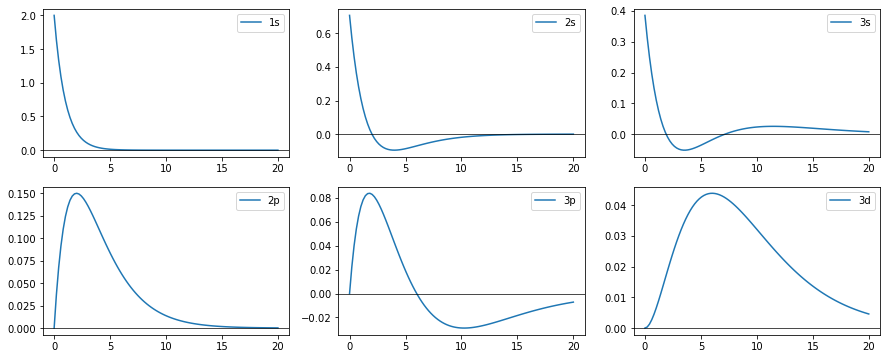

In [54]:
fig,axs=plt.subplots(2,3,figsize=(15,6))
axs[0][0].plot(np.linspace(0,20,100),[R(1,0,x) for x in np.linspace(0,20,100)],label='1s')
axs[0][1].plot(np.linspace(0,20,100),[R(2,0,x) for x in np.linspace(0,20,100)],label='2s')
axs[0][2].plot(np.linspace(0,20,100),[R(3,0,x) for x in np.linspace(0,20,100)],label='3s')

axs[1][0].plot(np.linspace(0,20,100),[R(2,1,x) for x in np.linspace(0,20,100)],label='2p')
axs[1][1].plot(np.linspace(0,20,100),[R(3,1,x) for x in np.linspace(0,20,100)],label='3p')
axs[1][2].plot(np.linspace(0,20,100),[R(3,2,x) for x in np.linspace(0,20,100)],label='3d')

for ax in axs.flatten():
    ax.legend()
    ax.axhline(0,lw=.7,color='black')

# Slater Type Orbitals  

The solutions to the hydrogen analyzed before atom are the product of the angular and the radial functions times a normalization constant $N$:
$$
\Psi_{n,\ell,m_\ell}(r,\theta,\phi) =N_{n,\ell,m_\ell} Y_{\ell }^{m_\ell}(\theta ,\phi )  L^{2\ell+1}_{n-\ell-1} \left({2r/ n} \right) r^{\ell}e^{-r/n}
$$
Slater proposed in 1930 to use as atomic basis set for the atoms orbitals build up as:
$$ \chi^{STO}_{a,b,c}(x,y,z)= N x^ay^bz^c e^{-\zeta r}
$$
where the sum $a+b+c$ equals the total angular momentum $\ell$  and the exponent $\zeta $ is a parameter which controls the width of the orbital. The coordinates $x,y,z$ are relative to the atom's nucleus.

If we compare those orbitals with the solution of the hydrogen atoms we can notice that the Legendre polynomials are no longer present, this simplification should not worry because for the description of polyelectronic atoms in the ground state there is no strict need for a radial nodal structure.<br>
A second difference is that the pruduct of the spherical harmonics $Y_{\ell }^{m_\ell}(\theta ,\phi )$and the $r^\ell$ function is condensed into the product of $x^ay^bz^c$

For a $p$ orbital the functions $x,y,z$ can replace the spherical harmonic, this can be easily verified (normalization constants are omitted for simplicity):


$$r {1 \over 2}(Y_1^{-1}\left(\theta\phi)-Y_1^{1}(\theta\phi)\right)= r sen(\theta) {1 \over 2}(e^{-i\phi}+e^{i\phi})=r sen(\theta)cos(\phi)=x $$
$$r {i \over 2}(Y_1^{-1}\left(\theta\phi)+Y_1^{1}(\theta\phi)\right)= r sen(\theta) {i \over 2}(e^{-i\phi}-e^{i\phi})=r sen(\theta)sen(\phi)=y $$
$$ rY_1^0(\theta\phi)=rcos(\theta)=z$$

For $d$ orbitals we know there should be 5 $d$ functions (usually chosen as $d_{xy},d_{xz},d_{yz},d_{z^2},d_{x^2-y^2}$); these are called “pure angular momentum” functions. Although some old (Gaussian) basis set such as the older Pople basis sets like 6-31G(d) were implemented with 6 $d$ basis functions ($d_{xy}, d_{xz}, d_{yz}, d_{z^2},d_{x^2},d_{y^2}$), this may lead to slight different results between between calculated results and literature values.
The same descrepancy apply also for $f$ functions: it’s 7 versus 10 $f$ functions .
Modern computers and modern basis sets are programmed to work with the correct number of pure angular momentum functions (5 for $d$ and 7 for $f$ orbitals).

# Contracted Gaussian Type Orbitals 

The use of Gaussian orbitals in electronic structure theory (instead of the more physical Slater-type orbitals) was first proposed by Boys in 1950, a huge contribtion in the develop of the first efficient CGTOs was also due to John Pople. <br>
The standard form for a contracted GTO is :
$$\chi^{CGTO}_{a,b,c}(x,y,z)=  x^ay^bz^c \sum_i c_i e^{-\zeta_i r^2}
$$

The CGTOs differs from the STOs because the exponential term is substituted by a sum of Gaussians; the coeffients $c_i$ as well as the exponents $\zeta_i $ are tabulated and depend on the type of orbital, as well as on the type of atom the base function belong. The coefficients are usually scaled in the way that the orbital is normalized $\int d \mathbf{r} \chi^2(\mathbf{r}) =1$ <br>  
The reasons for using a contraction of gaussians is to be found in the calculation of the electronic integrals. <br>
At the beginning of every QM calculation the software computes at least 4 matrices (overlap, kinetic, nuclear electron attraction, electron electron repulsion) that represent the relative operator in the AO basis set.
$$S_{ij}=\int d\mathbf{r}{\chi_i(\mathbf{r})}{\chi_j(\mathbf{r})}$$
$$T_{ij}=\int d\mathbf{r}{\chi_i(\mathbf{r})} {- \nabla^2 \over 2} {\chi_j(\mathbf{r})}$$
$$V^{ne}_{ij}=\int d\mathbf{r}{\chi_i(\mathbf{r})} V(\mathbf{r}) {\chi_j(\mathbf{r})} $$
$$V^{ee}_{ijkl}=\int d\mathbf{r_1}d\mathbf{r_2} \chi_i(\mathbf{r_1}) \chi_j(\mathbf{r_2}) {1 \over {|\mathbf{r_1}-\mathbf{r_2}|}} \chi_k(\mathbf{r_1}) {\chi_l(\mathbf{r_2})}$$

The usage of contracted gaussian basis set can simplify the evaluation of those integrals, in particular the gaussian product theorem guarantees that the product of two GTOs centered on two different atoms is a finite sum of Gaussians centered on a point along the axis connecting them. In this manner, four-center integrals can be reduced to finite sums of two-center integrals, and in a next step to finite sums of one-center integrals. <br>


# Types of basis sets

- __Minimal:__  One basis function for each atomic orbital in the atom
- __Double-zeta__ (2$\zeta$): Two basis function for each atomic orbital 
- __N-zeta__ (N$\zeta$): N basis function for each atomic orbital 
- __split valence__: only one basis function for each core AO, and a larger basis for the valence AO’s


In addition to the orbitals of each elements some basis also inlude additional  __Polarization__ and __Diffuse__ functions.<br>
In general, a basis function with angular momentum $\ell$, can be polarized by mixing with basis functions of angular momentum $\ell+1$ , as an example on a atom carbon the external $p$ orbitals can be polarized if we include in its basis set a complete set of $d$ orbitals as polarization functions, those add more angular flexibility to the basis set and improve the accuracy of the calculations. <br>
The diffuse functions have small $\zeta$ exponents; this means the electron is held far away from the nucleus. <br>
Diffuse functions are needed for describing anions and atoms with an high electronegativity such as fluorine, are also required for the accurate calculation of polarizabilities or binding energies of van der Waals complexes.

## STO-nG are minimal CGTOs' basis sets

The simplest and oldest contracted gaussians basis sets are the STO-nG (STO-3G,STO-6G) basis sets.
In an STO-nG basis set every orbital has a radial function represented by the contraction of n Gaussians (nG), chosen to mimic the behavior of a STO (interpolating the exponential function). <br>
STO-nG are minimal basis set, it means that has one basis function for each atomic orbital in the atom; hydrogen and helium  atoms have only the $1s$ orbital, atoms in the second period Li-Ne have 5 orbitals $1s,2s,2p_x,2p_y,2p_z$

A database for the basis set coefficients can be found at https://www.basissetexchange.org, the standard format for a basis set is the NWChem format.<br>
The contraction scheme for H ((3s) -> [1s] ) means that three Gaussians are contracted in one orbital , the $\zeta$ exponents are enlisted on the left column, while the coefficients of the contraction are on the right column. The exponents and the coefficients are in atomic units. <br>
The contraction scheme for C ( (6s,3p) -> [2s,1p] ) means that 6 gaussian can be contracted in 2 $s$ orbitals (3 and 3), 3 other gaussians are contracted in one set of $p$ orbitals, of course this means that we will have in this set $p_x,p_y,p_z$ orbitals sharing the same radial function. The 'SP' label in the second block of coefficients means that $2s$ and $2p$ orbitals share the same exponents listed in the first column of the table, the coefficients for the $s$ orbital are in the second column and the ones for the $p$ orbitals are in the third column.<br> 

PySCF contains in its libraries the same coefficients in an internal format

In [12]:
H=pyscf.gto.M(atom="H 0 0 0",basis="STO-3G",spin=1) # spin = number of unpaired electrons in the ground state 
C=pyscf.gto.M(atom="C 0 0 0",basis="STO-3G",spin=4)

In [13]:
print(H._basis),print(C._basis)

{'H': [[0, [3.42525091, 0.15432897], [0.62391373, 0.53532814], [0.1688554, 0.44463454]]]}
{'C': [[0, [71.616837, 0.15432897], [13.045096, 0.53532814], [3.5305122, 0.44463454]], [0, [2.9412494, -0.09996723], [0.6834831, 0.39951283], [0.2222899, 0.70011547]], [1, [2.9412494, 0.15591627], [0.6834831, 0.60768372], [0.2222899, 0.39195739]]]}


(None, None)

Coefficients and exponents can be obtained separately, is required to pass as argument the index of the AO function

In [14]:
print(H.bas_ctr_coeff(0).flatten())
print(H.bas_exp(0))

[0.15432897 0.53532814 0.44463454]
[3.42525091 0.62391373 0.1688554 ]


In [27]:
C=H.bas_ctr_coeff(0).flatten()
Z=H.bas_exp(0)
n=0
for i in range(3):
    for j in range(3):
       # print(n)
        n+= C[i]*C[j]* ((2*Z[i])**0.75*(2*Z[j])**0.75)/(Z[i]+Z[j])**1.5
n

1.0

In [25]:
C=H.bas_ctr_coeff(0).flatten()
Z=H.bas_exp(0)
n=0
for i in range(3):
    for j in range(3):
       # print(n)
        n+= C[i]*C[j]
C[1]**2+C[2]**2+C[0]**2

0.5080935272469658

## Exercise 2 : 
plot the radial function as well as the radial distribution of the $1s$ orbital for the STO-3G basis set and compare them to the one obtained from the analytical solution of the Hydrogen atom. 

In [28]:
def cgto(r,mol):
    f=0
    for i in range(H.bas_exp(0).size):
        f+=H.bas_ctr_coeff(0)[i][0]*(2*H.bas_exp(0)[i]/np.pi)**0.75* np.exp(- H.bas_exp(0)[i] *r**2)
    return (f)

In [29]:
cgto(1,H)

0.22303582712193068

In [30]:
def rad_dens(r):
    return (4*np.pi*r**2*cgto(r,H)**2)

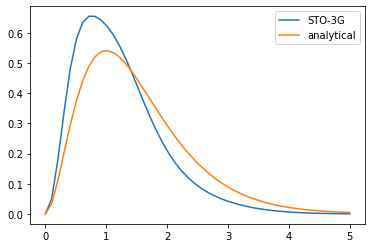

In [39]:
plt.plot(np.linspace(0,5,50),[rad_dens(x) for x in np.linspace(0,5,50)],label='STO-3G')
plt.plot(np.linspace(0,5,50),[4*x**2*np.exp(-2*x) for x in np.linspace(0,5,50)],label='analytical')
plt.legend()

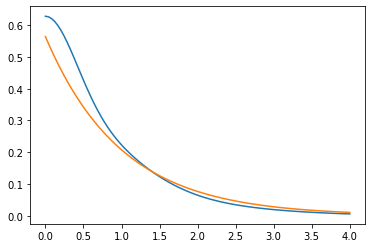

In [37]:
plt.plot(np.linspace(0,4,100),[cgto(x,H) for x in np.linspace(0,4,100)])
plt.plot(np.linspace(0,4,100),[np.exp(-x)/np.sqrt(np.pi) for x in np.linspace(0,4,100)])

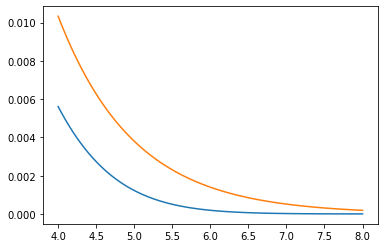

In [38]:
plt.plot(np.linspace(4,8,100),[cgto(x,H) for x in np.linspace(4,8,100)])
plt.plot(np.linspace(4,8,100),[np.exp(-x)/np.sqrt(np.pi) for x in np.linspace(4,8,100)])

# Pople's split valence Basis Sets
One among the most used basis set is Pople’s split-valence double-zeta basis set called __6-31G__; the core orbital is a CGTO made of 6 Gaussians, and the valence is described by two orbitals, one CGTO made of 3 Gaussians, and one single Gaussian, as an example a H and a C atom:


The Hydrogen has a $1s$ orbital splitted in two basis functions, one made up by three gaussians, the other by only one. <br>
The Carbon atom has the same double valence contraction scheme for $2s$ and $2p$ orbitals, the $1s$ orbital has only one basis function, made up by 6 gaussians.

Some improvement has been done on the 6-31G basis set 
- 6-31G* [or 6-31G(d)] is 6-31G with added d __polarization__ functions on non-hydrogen atoms; 6-31G* * [or 6-31G(d,p)] is 6-31G* plus p polarization functions for hydrogen
- 6-311G is a split-valence triple-zeta basis; it adds one GTO to the valence of 6-31G
- • 6-31+G is 6-31G plus __diffuse__ s and p functions for nonhydrogen atoms; 6-31++G has diffuse functions for hydrogen also.

# Dunning’s Correlation-Consistent Basis Sets 

Another widely used basis set family was propsed by Dunning with the aim to improve the quality of multiconfiguration calculations. The “correlation consistent” basis sets are optimized using correlated (CISD) wavefunctions. <br>
The name cc-pVXZ means a Dunning correlation-consistent, polarized valence, X-zeta basis; X=D,T,Q,5,6,7.
In these split-valence basis sets the polarization functions are added in shells, this means that for a carbon atom a cc-pVDZ the minimal basis set consists of 2s1p, cc-pVDZ is 3s2p1d, cc-pVTZ is 4s3p2d1f, cc-pVQZ is 5s4p3d2f1g.


In this file the first column is for the gaussian exponents, the other columns are the contraction coefficients for each CGTO.

Some important facts about cc basis sets:
- The Dunning basis sets are designed to converge smoothly toward the complete (infinite) basis set limit
- It is possible to extrapolate the results to approximate the basis set limit
- Functions describing core correlation are denoted by the letter “C” in the cc-pCVXZ or aug-cc-pCVXZ basis sets; you should use basis sets like this if you do not freeze core electrons in post-Hartree-Fock computations like MP2,CISD, CCSD(T), etc.
- A prefix “aug” means one set of diffuse functions is added for every angular momentum present in the basis; aug-cc-pVDZ for C atom has diffuse s,p,d